# Xử lý ngôn ngữ tự nhiên - Natural Language Processing

Các đánh giá của thực khách đến nhà hàng là một phần quan trọng để phát triển nhà hàng. Dựa trên đánh giá này nhà hàng có thể đưa ra các cải tiến phù hợp cho sau này. Tuy nhiên, có nhiều loại đánh giá khác nhau, chúng ta cần phân loại chúng để xử lý.

Dữ liệu được cung cấp bao gồm các các nhận xét của thực khách về nhà hàng và được phân làm hai loại thích và không thích.


**Yêu cầu:**
1. Tạo tập dữ liệu từ dữ liệu thô (**Restaurant_Reviews.csv**):
    - Làm sạch dữ liệu (có thể dùng thư viện nltk để hỗ trợ), dùng wordcloud để visualize dữ liệu, chia dữ liệu ra làm 2 phần huấn luyện, kiểm ra với tỉ lệ 8:2
    - Dùng mô hình Bags of Words để huyển dữ liệu về dạng vector
    - Chia tập dữ liệu thành 2 phần để huấn luyện và kiểm tra mô hình
3. Dùng mô hình Naive Bayes để phân loại các đánh giá


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cài đặt một số thư viện phổ biến

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cài đặt dữ liệu

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/CS116/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [6]:
print(dataset.head(5))

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


## Làm sạch dữ liệu

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk, re
nltk.download('stopwords')
n_sample = len(dataset)
corpus = []
for i in range(n_sample):
    #1. Remove all the non-text elements from the review like emoticons, exclamatory mark, etc
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    
    #2. Convert the text to lower case.
    review = review.lower()

    #3. split the review to match the words from the stop word list and remove the words not required.
    #4. PorterStemmer is used to obtain the root word of all the words, eg loved, loving will become love.

    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]

    #5 after performing all the operations join the words back to apply machine learning.
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [43]:
from wordcloud import WordCloud
def create_wordcloud(list_sample):
    # a list contains texts
    wordcloud = WordCloud(width = 500, height = 300,
                          background_color='white',
                          min_font_size = 8).generate(' '.join(list_sample))
    #return wordcloud
    #plot image
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

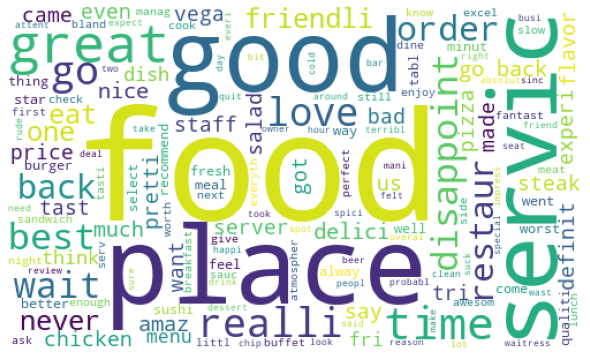

In [44]:
create_wordcloud(corpus)

## Tạo mô hình Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [46]:
X = cv.fit_transform(corpus).toarray()
y = dataset['Liked'].values

In [47]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra 

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Huấn luyện Naive Bayes model trên dữ liệu

In [70]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
classifier_NB = BernoulliNB()
classifier_NB.fit(X_train,y_train)

BernoulliNB()

## Dự đoán kết quả trên dữ liệu kiểm tra

In [72]:
y_pred_NB = classifier_NB.predict(X_test)

## Đánh giá kết quả dự đoán bằng Confusion Matrix

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        96
           1       0.77      0.80      0.78       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [74]:
confusion_matrix(y_test,y_pred_NB)

array([[71, 25],
       [21, 83]])